In [ ]:
pip install qiskit

In [ ]:
pip install matplotlib

In [ ]:
import qiskit

In [151]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.23.3', 'qiskit-aer': '0.12.0', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.2', 'qiskit': '0.42.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [ ]:
from qiskit import IBMQ

In [ ]:
IBMQ.save_account('')

In [ ]:
IBMQ.load_account()

สวัสดีชาวโลก | Hello World

In [152]:
from qiskit import *

In [153]:
qr = QuantumRegister(2)

In [154]:
cr = ClassicalRegister(2)

In [155]:
circuit = QuantumCircuit(qr, cr)

In [156]:
%matplotlib inline

In [157]:
circuit.draw()

q59_0: 
       
q59_1: 
       
 c2: 2/

In [158]:
circuit.h(qr[0])

In [159]:
circuit.draw()

┌───┐
q59_0: ┤ H ├
       └───┘
q59_1: ─────
            
 c2: 2/═════

In [160]:
circuit.cx(qr[0], qr[1])

In [161]:
circuit.draw()

┌───┐     
q59_0: ┤ H ├──■──
       └───┘┌─┴─┐
q59_1: ─────┤ X ├
            └───┘
 c2: 2/══════════

In [162]:
circuit.measure(qr, cr)

In [163]:
circuit.draw()

┌───┐     ┌─┐   
q59_0: ┤ H ├──■──┤M├───
       └───┘┌─┴─┐└╥┘┌─┐
q59_1: ─────┤ X ├─╫─┤M├
            └───┘ ║ └╥┘
 c2: 2/═══════════╩══╩═
                  0  1

In [164]:
simulator = Aer.get_backend('qasm_simulator')

In [165]:
result = execute(circuit, backend= simulator).result()

In [166]:
from qiskit.tools.visualization import plot_histogram

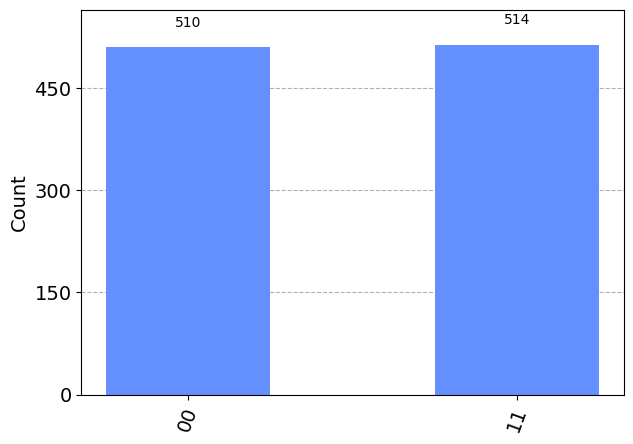

In [167]:
plot_histogram(result.get_counts(circuit))

In [168]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-04-16 12:12:13,257: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [169]:
provider = IBMQ.get_provider('ibm-q')

In [170]:
qcomp = provider.get_backend('simulator_stabilizer') #1000 Qubits

In [171]:
job = execute(circuit, backend=qcomp)

In [172]:
from qiskit.tools.monitor import job_monitor

In [173]:
job_monitor(job)

Job Status: job has successfully run


In [174]:
result = job.result()

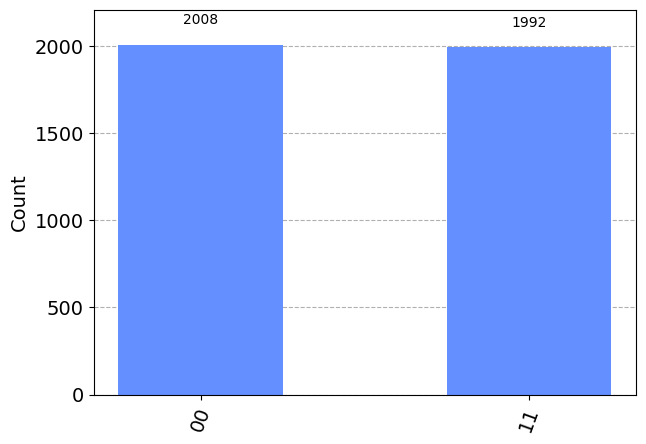

In [175]:
plot_histogram(result.get_counts(circuit))

ลอจิกเกต | Gates

In [176]:
from qiskit import *

In [177]:
from qiskit.tools.visualization import  plot_bloch_multivector

In [178]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend= simulator).result()
statevector = result.get_statevector()
print(statevector)

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


In [179]:
circuit.draw()

┌───┐
  q: ┤ X ├
     └───┘
c: 1/═════

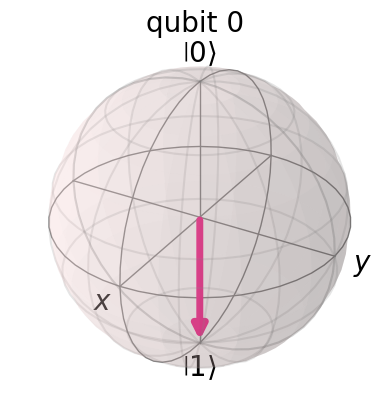

In [180]:
plot_bloch_multivector(statevector)

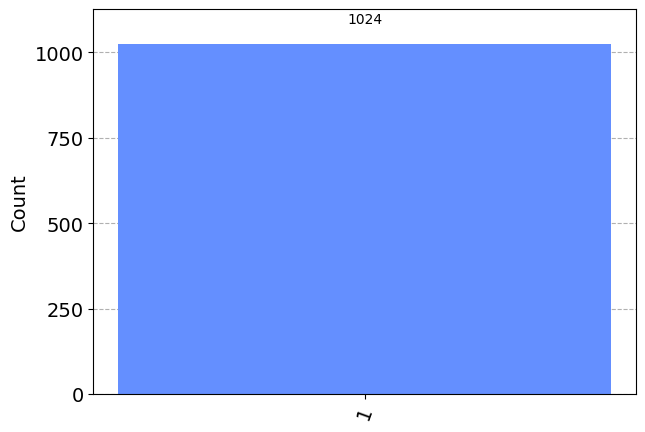

In [181]:
circuit.measure([0], [0])
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend= backend, shots= 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import  plot_histogram
plot_histogram(counts)

In [182]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
simulator = Aer.get_backend('unitary_simulator')
result = execute(circuit, backend= simulator).result()
unitary = result.get_unitary()
print(unitary)

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


เทเลพอร์ต | Teleportation

In [183]:
from qiskit import *

In [184]:
circuit = QuantumCircuit(3, 3)

In [185]:
%matplotlib inline

In [186]:
circuit.draw()

q_0: 
     
q_1: 
     
q_2: 
     
c: 3/

In [187]:
circuit.x(0)
circuit.barrier()
circuit.draw()

┌───┐ ░ 
q_0: ┤ X ├─░─
     └───┘ ░ 
q_1: ──────░─
           ░ 
q_2: ──────░─
           ░ 
c: 3/════════

In [188]:
circuit.h(1)
circuit.cx(1,2)

In [189]:
circuit.draw()

┌───┐ ░           
q_0: ┤ X ├─░───────────
     └───┘ ░ ┌───┐     
q_1: ──────░─┤ H ├──■──
           ░ └───┘┌─┴─┐
q_2: ──────░──────┤ X ├
           ░      └───┘
c: 3/══════════════════

In [190]:
circuit.cx(0,1)
circuit.h(0)
circuit.draw()

┌───┐ ░                ┌───┐
q_0: ┤ X ├─░─────────────■──┤ H ├
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘
q_1: ──────░─┤ H ├──■──┤ X ├─────
           ░ └───┘┌─┴─┐└───┘     
q_2: ──────░──────┤ X ├──────────
           ░      └───┘          
c: 3/════════════════════════════

In [191]:
circuit.barrier()
circuit.measure([0,1], [0,1])
circuit.draw()

┌───┐ ░                ┌───┐ ░ ┌─┐   
q_0: ┤ X ├─░─────────────■──┤ H ├─░─┤M├───
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├
           ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘
q_2: ──────░──────┤ X ├───────────░──╫──╫─
           ░      └───┘           ░  ║  ║ 
c: 3/════════════════════════════════╩══╩═
                                     0  1

In [192]:
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw()

┌───┐ ░                ┌───┐ ░ ┌─┐    ░         
q_0: ┤ X ├─░─────────────■──┤ H ├─░─┤M├────░───────■─
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░       │ 
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├─░───■───┼─
           ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘ ░ ┌─┴─┐ │ 
q_2: ──────░──────┤ X ├───────────░──╫──╫──░─┤ X ├─■─
           ░      └───┘           ░  ║  ║  ░ └───┘   
c: 3/════════════════════════════════╩══╩════════════
                                     0  1

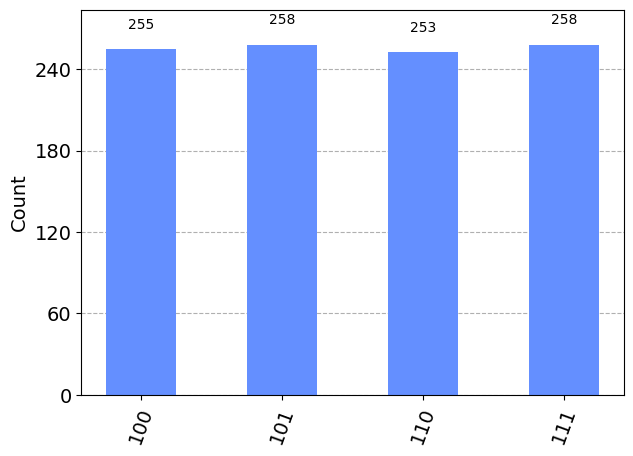

In [193]:
circuit.measure(2,2)
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [194]:
print(counts)

{'111': 258, '110': 253, '100': 255, '101': 258}


อัลกอริทึม | Bernstein Vazirani

In [195]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [196]:
secretnumber = '01000001'

In [197]:
#circuit = QuantumCircuit(6+1, 6)
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))

#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))
#circuit.x(6)
circuit.x(len(secretnumber))
#circuit.h(6)
circuit.h(len(secretnumber))

circuit.barrier()

for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii, len(secretnumber))

#circuit.cx(5, 6)
#circuit.cx(3, 6)
#circuit.cx(0, 6)

circuit.barrier()
#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))
circuit.barrier()
#circuit.measure([0,1,2,3,4,5], [0,1,2,3,4,5])
circuit.measure(range(len(secretnumber)), range(len(secretnumber)))

In [198]:
circuit.draw()

┌───┐      ░            ░ ┌───┐ ░ ┌─┐                     
q_0: ┤ H ├──────░───■────────░─┤ H ├─░─┤M├─────────────────────
     ├───┤      ░   │        ░ ├───┤ ░ └╥┘┌─┐                  
q_1: ┤ H ├──────░───┼────────░─┤ H ├─░──╫─┤M├──────────────────
     ├───┤      ░   │        ░ ├───┤ ░  ║ └╥┘┌─┐               
q_2: ┤ H ├──────░───┼────────░─┤ H ├─░──╫──╫─┤M├───────────────
     ├───┤      ░   │        ░ ├───┤ ░  ║  ║ └╥┘┌─┐            
q_3: ┤ H ├──────░───┼────────░─┤ H ├─░──╫──╫──╫─┤M├────────────
     ├───┤      ░   │        ░ ├───┤ ░  ║  ║  ║ └╥┘┌─┐         
q_4: ┤ H ├──────░───┼────────░─┤ H ├─░──╫──╫──╫──╫─┤M├─────────
     ├───┤      ░   │        ░ ├───┤ ░  ║  ║  ║  ║ └╥┘┌─┐      
q_5: ┤ H ├──────░───┼────────░─┤ H ├─░──╫──╫──╫──╫──╫─┤M├──────
     ├───┤      ░   │        ░ ├───┤ ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ┤ H ├──────░───┼────■───░─┤ H ├─░──╫──╫──╫──╫──╫──╫─┤M├───
     ├───┤      ░   │    │   ░ ├───┤ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ┤ H ├──────░───┼────┼───░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐ ░ └───┘ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
q_8: ┤ X ├┤ H ├─░─┤ X ├┤ X ├─░───────░──╫──╫──╫──╫──╫──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘ ░       ░  ║  ║  ║  ║  ║  ║  ║  ║ 
c: 8/═══════════════════════════════════╩══╩══╩══╩══╩══╩══╩══╩═
                                        0  1  2  3  4  5  6  7

In [199]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend= simulator, shots= 1).result()
counts = result.get_counts()
print(counts)

{'01000001': 1}


Programming on Quantum Computeres

In [200]:
text = "Hello, World!"
binary_strings = []
for char in text:
    ascii_code = ord(char)
    binary_string = bin(ascii_code)[2:].zfill(8)
    binary_strings.append(binary_string)
binary_text = " ".join(binary_strings)
print(binary_text)

01001000 01100101 01101100 01101100 01101111 00101100 00100000 01010111 01101111 01110010 01101100 01100100 00100001


In [201]:
binary_text = "01001000 01100101 01101100 01101100 01101111 00101100 00100000 01010111 01101111 01110010 01101100 01100100 00100001"
binary_strings = binary_text.split()
text = ""
for binary_string in binary_strings:
    ascii_code = int(binary_string, 2)
    char = chr(ascii_code)
    text += char
print(text)

Hello, World!


Mitigating Noise on Real Quantum Computers

In [202]:
from qiskit import *

In [203]:
nqubits = 3
circuit = QuantumCircuit(nqubits, nqubits)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2], [0,1,2])

In [204]:
%matplotlib inline
circuit.draw()

┌───┐          ┌─┐      
q_0: ┤ H ├──■───────┤M├──────
     └───┘┌─┴─┐     └╥┘┌─┐   
q_1: ─────┤ X ├──■───╫─┤M├───
          └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     0  1  2

In [205]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(circuit, backend= simulator, shots=1024).result()

In [206]:
from qiskit.visualization import  plot_histogram

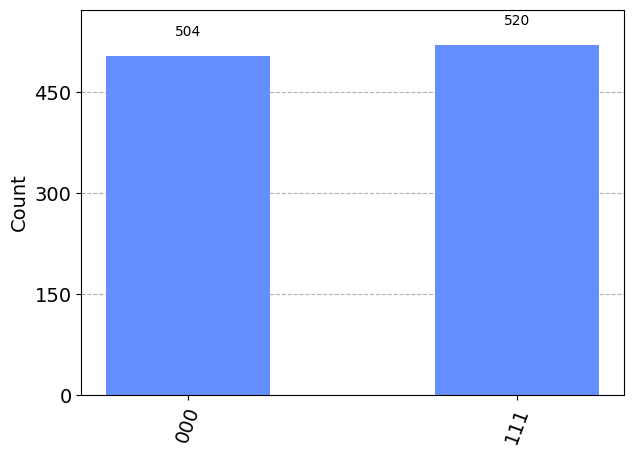

In [207]:
plot_histogram(sim_result.get_counts(circuit))

In [208]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend('simulator_mps') #100 Qubits

ibmqfactory.load_account:WARNING:2023-04-16 12:14:55,960: Credentials are already in use. The existing account in the session will be replaced.


In [209]:
job = execute(circuit, backend= device, shots= 1024)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

cgtudijagcl60bnkp2ig
Job Status: job has successfully run


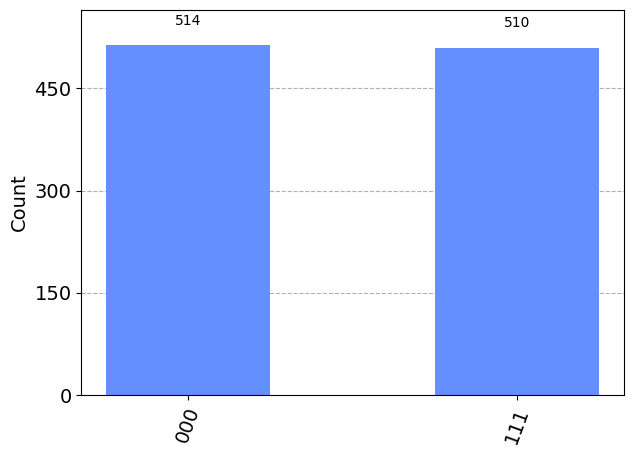

In [210]:
device_result = job.result()
plot_histogram(device_result.get_counts(circuit))